# **[필수 과제2] 시계열 데이터**

- 기존 데이터의 분포와 관계 확인 (시각화)
- 결측값 생성 후 interpolation, iterative imputer 진행
- 결과 비교하기

In [ ]:
# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer # 임퓨터 불러오기
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('seattle-weather.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


### **시계열 데이터로 변환**

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [ ]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

### DatetimeIndex 설정

In [ ]:
df1 = df.set_index('date')

In [ ]:
df1

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain
2015-12-28,1.5,5.0,1.7,1.3,rain
2015-12-29,0.0,7.2,0.6,2.6,fog


### **결측치 생성 전 데이터 분포, 관계 확인**

<ipython-input-9-06c957864b15>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

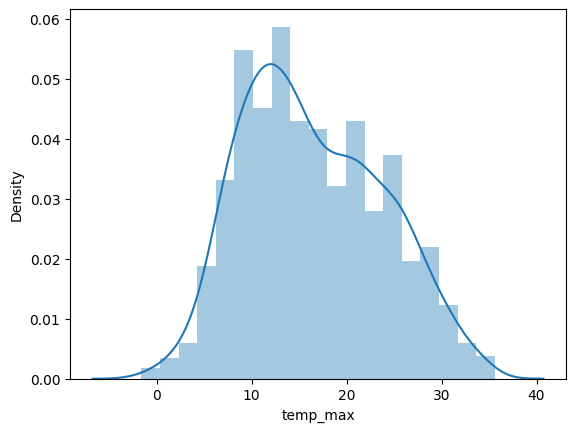

In [ ]:
sns.distplot(df1['temp_max'])

<ipython-input-10-038afce85f66>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['temp_min'])


<Axes: xlabel='temp_min', ylabel='Density'>

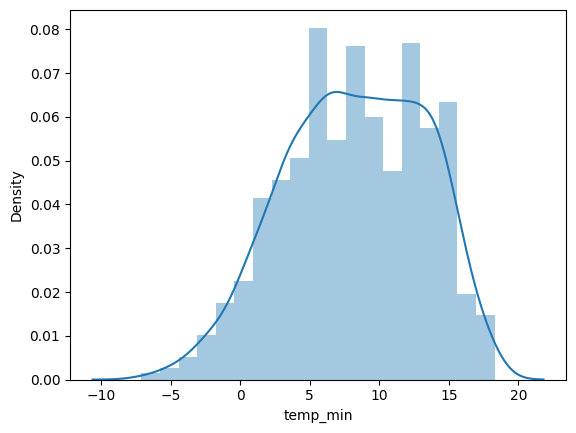

In [ ]:
sns.distplot(df1['temp_min'])

<ipython-input-11-9f845a9b7a8a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['wind'])


<Axes: xlabel='wind', ylabel='Density'>

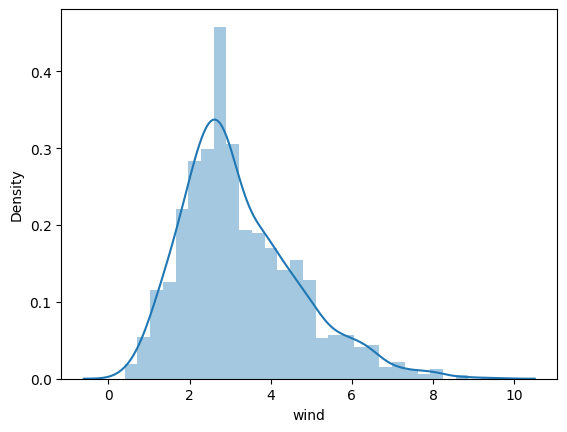

In [ ]:
sns.distplot(df1['wind'])

<Axes: xlabel='date'>

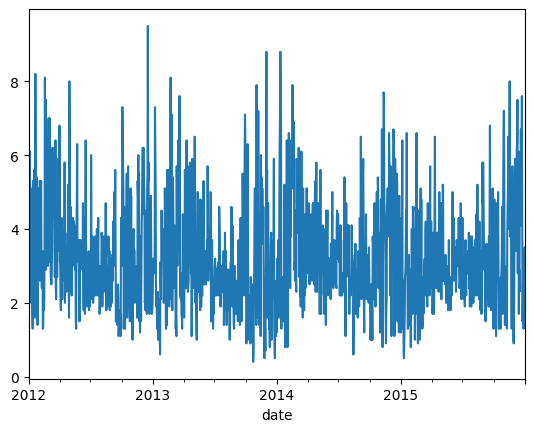

In [ ]:
df1['wind'].plot()

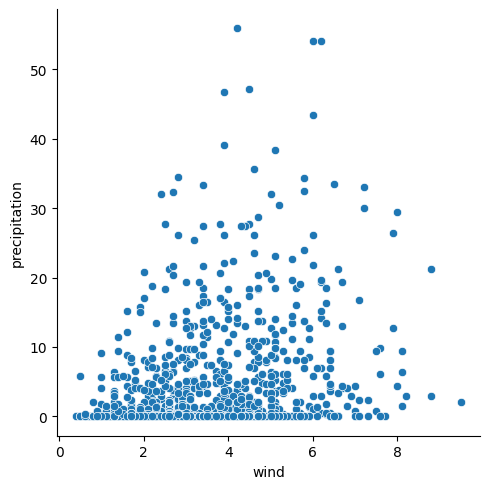

In [ ]:
sns.relplot(data=df1, x='wind', y='precipitation')

<Axes: xlabel='temp_max', ylabel='precipitation'>

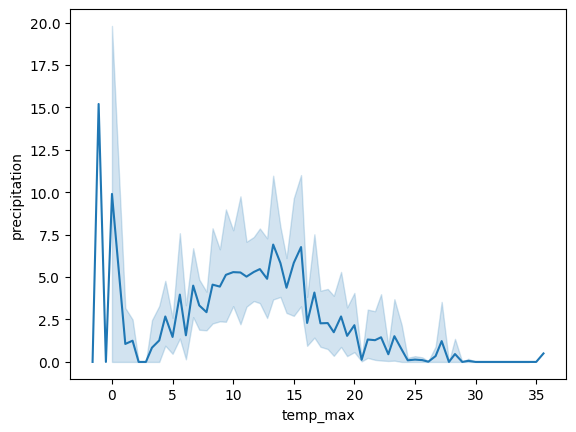

In [ ]:
sns.lineplot(data=df1, x='temp_max', y='precipitation')

<Axes: xlabel='temp_min', ylabel='precipitation'>

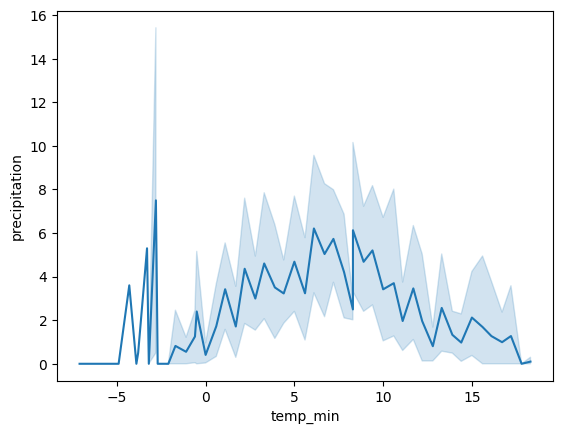

In [83]:
sns.lineplot(data=df_mean, x='temp_min', y='precipitation')

## **결측치 만들기**

####'temp_max':100개, 'temp_min':500개, 'wind':1000개

In [ ]:
df_x = df1[['temp_max', 'temp_min', 'wind']]
# df_y = df1['precipitation']

In [ ]:
df_x

,temp_max,temp_min,wind
date,,,
2012-01-01,12.8,5.0,4.7
2012-01-02,10.6,2.8,4.5
2012-01-03,11.7,7.2,2.3
2012-01-04,12.2,5.6,4.7
2012-01-05,8.9,2.8,6.1
...,...,...,...
2015-12-27,4.4,1.7,2.9
2015-12-28,5.0,1.7,1.3
2015-12-29,7.2,0.6,2.6


In [ ]:
msv_max = np.random.randint(0, 1460, size=100)
msv_min = np.random.randint(0, 1460, size=500)
msv_wind = np.random.randint(0, 1460, size=1000)

In [ ]:
df_x['temp_max'].iloc[msv_max] = np.nan
df_x['temp_min'].iloc[msv_min] = np.nan
df_x['wind'].iloc[msv_wind] = np.nan

<ipython-input-18-cd24a098bb2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['temp_max'].iloc[msv_max] = np.nan
<ipython-input-18-cd24a098bb2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['temp_min'].iloc[msv_min] = np.nan
<ipython-input-18-cd24a098bb2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['wind'].iloc[msv_wind] = np.nan


In [ ]:
df_x.isna().sum()

temp_max     98
temp_min    431
wind        712
dtype: int64

## **1) 평균값으로 대체**

In [ ]:
# y값과 연결
df_mean = pd.concat([df_x, df1['precipitation']], axis=1)

In [ ]:
df_mean

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,NaN,NaN,10.9
2012-01-03,11.7,NaN,2.3,0.8
2012-01-04,12.2,5.6,4.7,20.3
2012-01-05,8.9,NaN,NaN,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,NaN,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,NaN,0.0


<Axes: xlabel='date'>

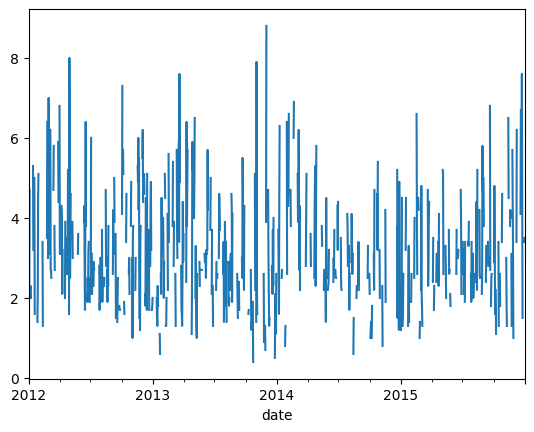

In [ ]:
df_mean['wind'].plot()

결측치 대체 전에는 그래프가 끊기는 것 확인 가능

In [ ]:
df_mean['temp_max'] = df_mean['temp_max'].fillna(df_mean['temp_max'].mean())
df_mean['temp_min'] = df_mean['temp_min'].fillna(df_mean['temp_min'].mean())
df_mean['wind'] = df_mean['wind'].fillna(df_mean['wind'].mean())

In [ ]:
df_mean.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

### **데이터 분할 7 : 3** ('2014-10-17' 기준으로 분할)

In [ ]:
X_mean = df_mean.drop('precipitation', axis=1)
y_mean = df_mean['precipitation']

In [ ]:
split_date = pd.to_datetime('2014-10-17')

In [ ]:
X_train = X_mean.loc[:split_date]
X_test = X_mean.loc[split_date:]
y_train = y_mean.loc[:split_date]
y_test = y_mean.loc[split_date:]

In [ ]:
X_train.shape, y_train.shape

((1021, 3), (1021,))

In [ ]:
X_test.shape, y_test.shape

((441, 3), (441,))

In [ ]:
# 회귀분석에 필요한 모듈
import statsmodels.api as sm

In [ ]:
# 회귀분석 (다중회귀)
fit_train1 = sm.OLS(y_train, X_train)

In [ ]:
fit_train1 = fit_train1.fit()

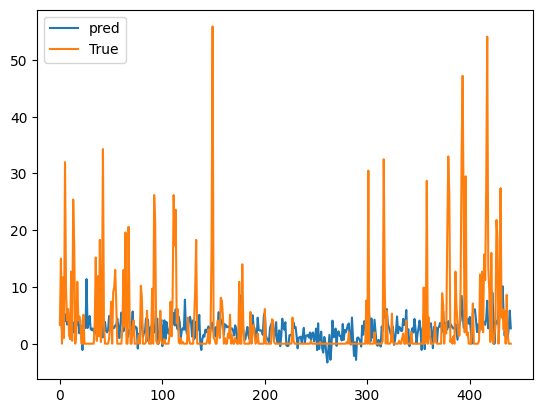

In [ ]:
# 예측
plt.plot(np.array(fit_train1.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test, fit_train1.predict(X_test))

In [ ]:
mse

53.890378707618005

## **2) 보간법으로 대체**

In [ ]:
# y값과 연결
df_itp = pd.concat([df_x, df1['precipitation']], axis=1)

In [ ]:
df_itp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,NaN,NaN,10.9
2012-01-03,11.7,NaN,2.3,0.8
2012-01-04,12.2,5.6,4.7,20.3
2012-01-05,8.9,NaN,NaN,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,NaN,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,NaN,0.0


In [ ]:
df_itp['temp_max'] = df_itp['temp_max'].interpolate(method='linear')
df_itp['temp_min'] = df_itp['temp_min'].interpolate(method='linear')
df_itp['wind'] = df_itp['wind'].interpolate(method='linear')

In [ ]:
df_itp.isna().sum()

temp_max         0
temp_min         0
wind             0
precipitation    0
dtype: int64

In [ ]:
X_itp = df_itp.drop('precipitation', axis=1)
y_itp = df_itp['precipitation']

In [ ]:
X_train = X_itp.loc[:split_date]
X_test = X_itp.loc[split_date:]
y_train = y_itp.loc[:split_date]
y_test = y_itp.loc[split_date:]

In [ ]:
fit_train2 = sm.OLS(y_train, X_train)

In [ ]:
fit_train2 = fit_train2.fit()

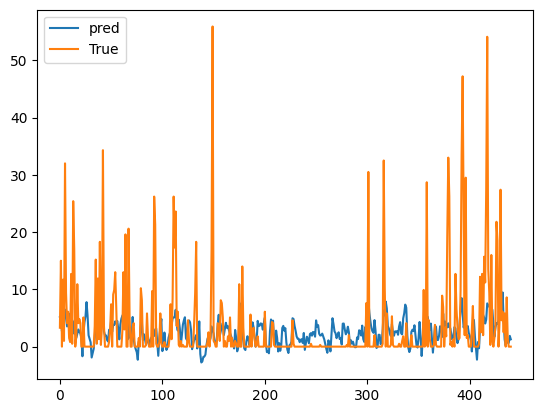

In [ ]:
# 예측
plt.plot(np.array(fit_train2.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
mse2 = mean_squared_error(y_test, fit_train2.predict(X_test))

In [ ]:
mse2

51.01727417867978

선형보간으로 진행하니 실제 평균값으로 대체하는 것보다 낮은 mse값 나옴

## **3) iterative imputer로 대체**

In [ ]:
imputer = IterativeImputer(imputation_order = 'descending',
                          max_iter=10, random_state=111,
                          n_nearest_features=4)

In [ ]:
# y값과 연결
df_imp = pd.concat([df_x, df1['precipitation']], axis=1)

In [ ]:
df_imp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.0,4.7,0.0
2012-01-02,10.6,NaN,NaN,10.9
2012-01-03,11.7,NaN,2.3,0.8
2012-01-04,12.2,5.6,4.7,20.3
2012-01-05,8.9,NaN,NaN,1.3
...,...,...,...,...
2015-12-27,4.4,1.7,NaN,8.6
2015-12-28,5.0,1.7,1.3,1.5
2015-12-29,7.2,0.6,NaN,0.0


In [ ]:
df_imp = imputer.fit_transform(df_imp)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [ ]:
# DataFrame으로 변환
df_imp = pd.DataFrame(df_imp)

In [ ]:
df_imp

,0,1,2,3
0,12.8,5.000000,4.700000,0.0
1,10.6,5.390813,3.806274,10.9
2,11.7,4.976653,2.300000,0.8
3,12.2,5.600000,4.700000,20.3
4,8.9,3.371063,3.295419,1.3
...,...,...,...,...
1456,4.4,1.700000,3.809326,8.6
1457,5.0,1.700000,1.300000,1.5
1458,7.2,0.600000,3.221525,0.0
1459,5.6,1.191225,3.400000,0.0


In [ ]:
# 시계열로 변환
df_imp['date'] = pd.to_datetime(df['date'])
df_imp.set_index('date', inplace=True)

In [ ]:
df_imp.columns = ['temp_max', 'temp_min', 'wind', 'precipitation']

In [ ]:
df_imp

,temp_max,temp_min,wind,precipitation
date,,,,
2012-01-01,12.8,5.000000,4.700000,0.0
2012-01-02,10.6,5.390813,3.806274,10.9
2012-01-03,11.7,4.976653,2.300000,0.8
2012-01-04,12.2,5.600000,4.700000,20.3
2012-01-05,8.9,3.371063,3.295419,1.3
...,...,...,...,...
2015-12-27,4.4,1.700000,3.809326,8.6
2015-12-28,5.0,1.700000,1.300000,1.5
2015-12-29,7.2,0.600000,3.221525,0.0


In [ ]:
X_imp = df_imp.drop('precipitation', axis=1)
y_imp = df_imp['precipitation']

In [ ]:
X_train = X_imp.loc[:split_date]
X_test = X_imp.loc[split_date:]
y_train = y_imp.loc[:split_date]
y_test = y_imp.loc[split_date:]

In [ ]:
fit_train3 = sm.OLS(y_train, X_train)

In [ ]:
fit_train3 = fit_train3.fit()

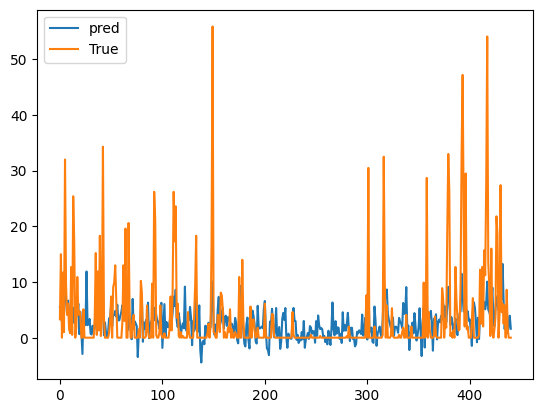

In [ ]:
# 예측
plt.plot(np.array(fit_train3.predict(X_test)), label='pred')
plt.plot(np.array(y_test), label='True')
plt.legend()
plt.show()

In [ ]:
mse3 = mean_squared_error(y_test, fit_train3.predict(X_test))

In [ ]:
mse3

43.76588539624756

In [ ]:
# 결측치 대체에 어떤 방법이 가장 좋을까..?
print('단순평균대치법 :', mse)
print('선형보간법 :', mse2)
print('iterative imputer :', mse3)

단순평균대치법 : 53.890378707618005
선형보간법 : 51.01727417867978
iterative imputer : 43.76588539624756


# **iterative imputer 방법이 가장 오차가 작은 것을 알 수 있음**



### **결측치 생성 후 데이터 분포, 관계 확인**

1) 평균값 대체

<ipython-input-65-e221847a8891>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mean['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

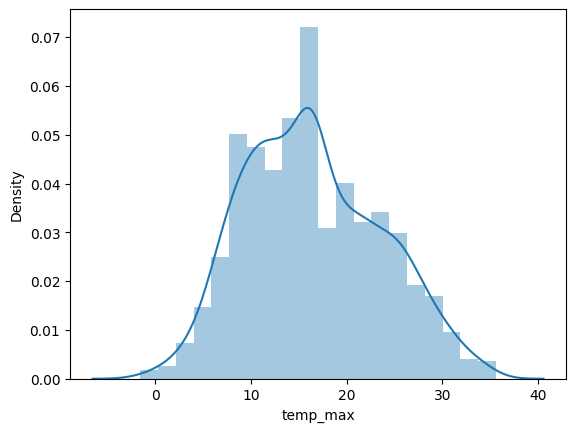

In [ ]:
sns.distplot(df_mean['temp_max'])

<ipython-input-66-42994a98631e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mean['temp_min'])


<Axes: xlabel='temp_min', ylabel='Density'>

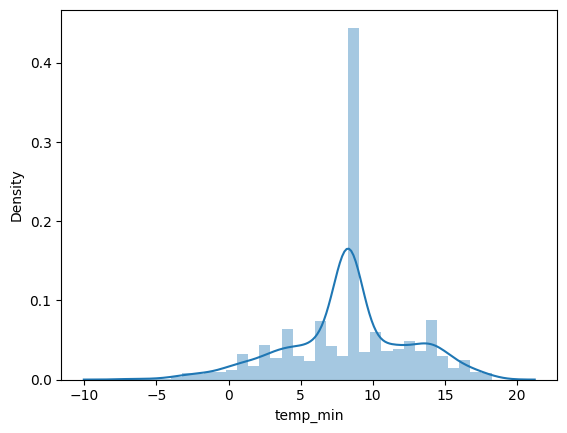

In [ ]:
sns.distplot(df_mean['temp_min'])

<ipython-input-67-02b117bc8565>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_mean['wind'])


<Axes: xlabel='wind', ylabel='Density'>

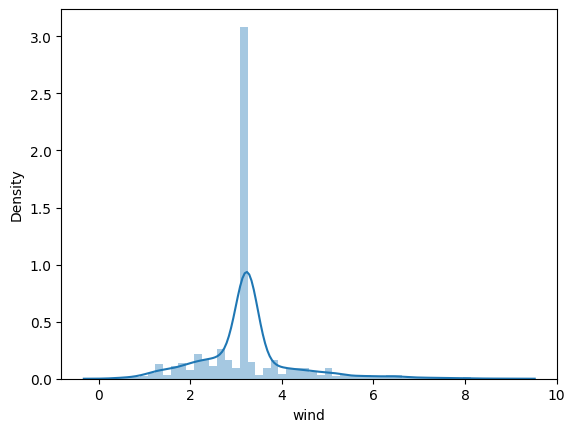

In [ ]:
sns.distplot(df_mean['wind'])

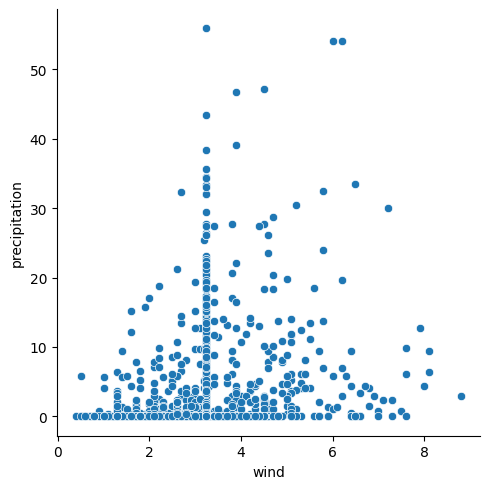

In [ ]:
sns.relplot(data=df_mean, x='wind', y='precipitation')

<Axes: xlabel='temp_max', ylabel='precipitation'>

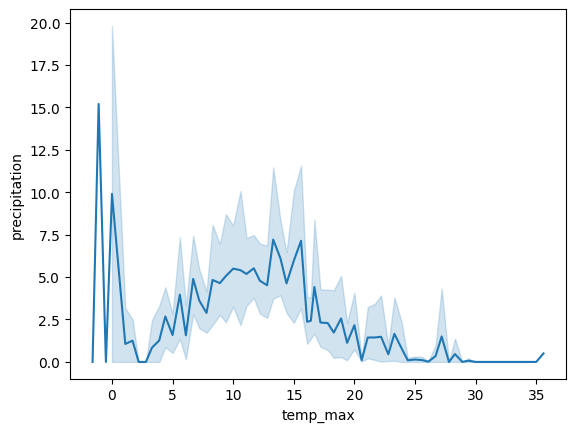

In [ ]:
sns.lineplot(data=df_mean, x='temp_max', y='precipitation')

<Axes: xlabel='temp_min', ylabel='precipitation'>

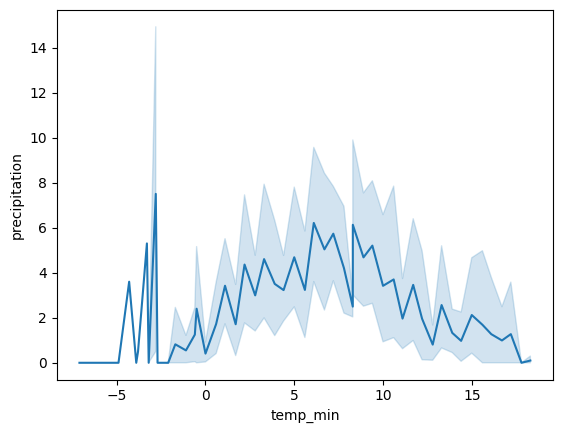

In [82]:
sns.lineplot(data=df_mean, x='temp_min', y='precipitation')



---

2) 선형보간법 대체

<ipython-input-70-13919d37ae11>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_itp['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

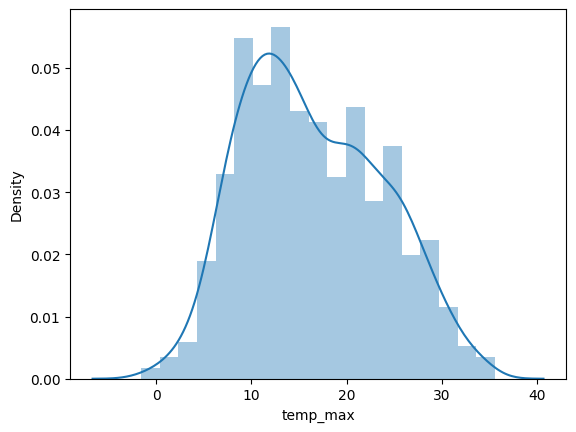

In [ ]:
sns.distplot(df_itp['temp_max'])

<ipython-input-71-21bc6d8bc886>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_itp['temp_min'])


<Axes: xlabel='temp_min', ylabel='Density'>

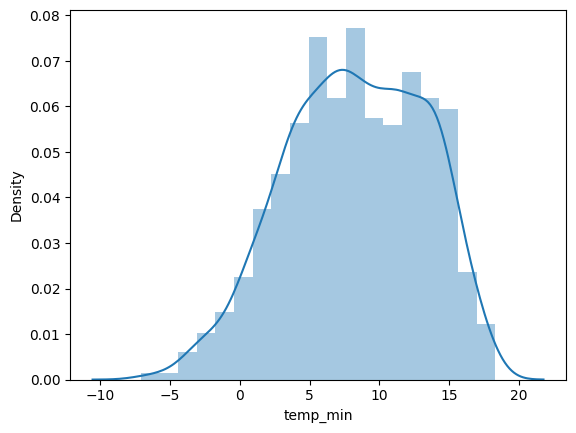

In [ ]:
sns.distplot(df_itp['temp_min'])

<ipython-input-72-19fa042a3c51>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_itp['wind'])


<Axes: xlabel='wind', ylabel='Density'>

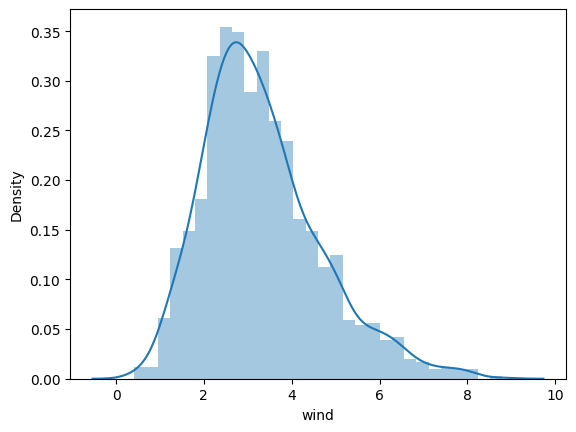

In [ ]:
sns.distplot(df_itp['wind'])

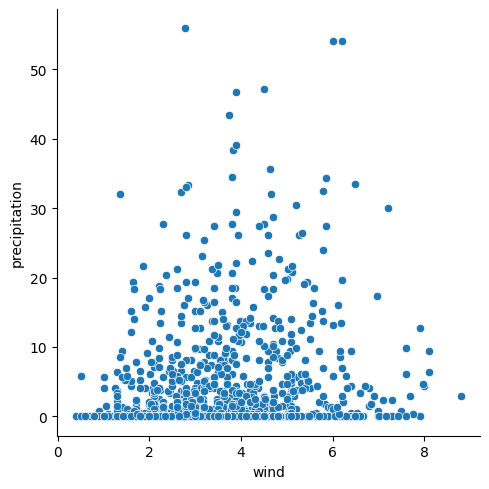

In [ ]:
sns.relplot(data=df_itp, x='wind', y='precipitation')

<Axes: xlabel='temp_max', ylabel='precipitation'>

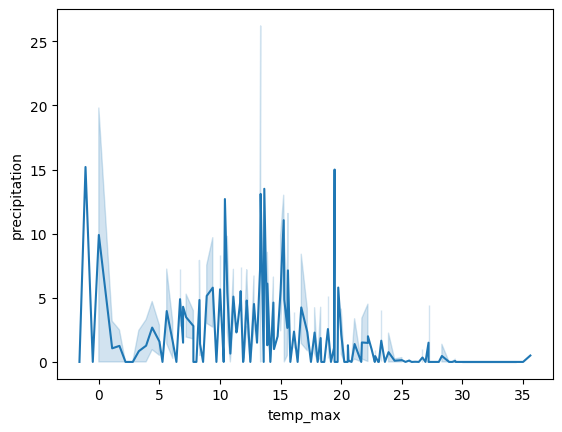

In [ ]:
sns.lineplot(data=df_itp, x='temp_max', y='precipitation')

<Axes: xlabel='temp_min', ylabel='precipitation'>

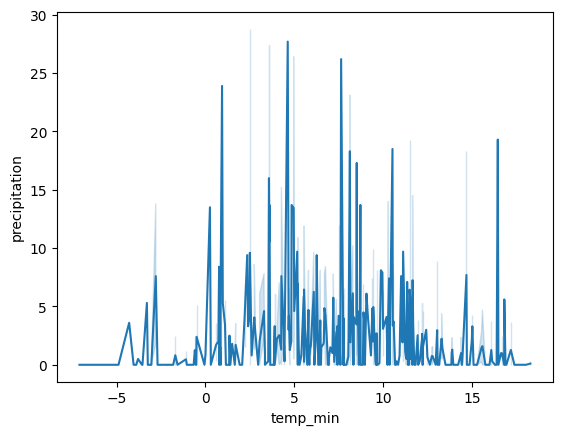

In [81]:
sns.lineplot(data=df_itp, x='temp_min', y='precipitation')


---
3) iterative imputer 대체



<ipython-input-75-74e880cfccb9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imp['temp_max'])


<Axes: xlabel='temp_max', ylabel='Density'>

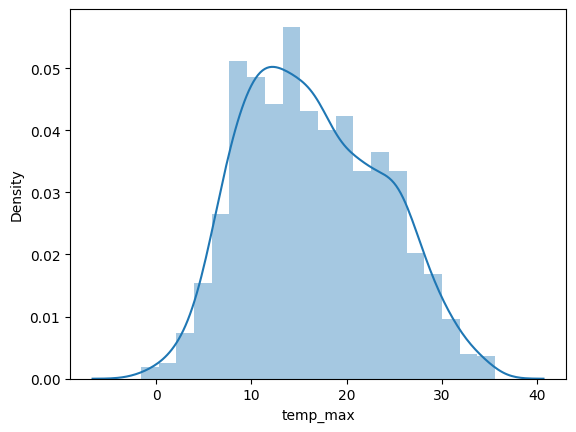

In [ ]:
sns.distplot(df_imp['temp_max'])

<ipython-input-76-8d45a5589704>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imp['temp_min'])


<Axes: xlabel='temp_min', ylabel='Density'>

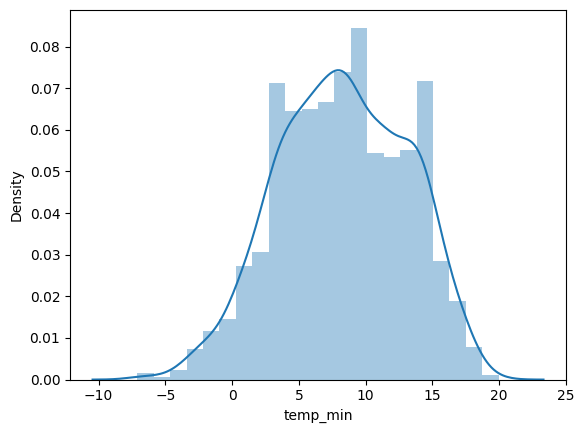

In [ ]:
sns.distplot(df_imp['temp_min'])

<ipython-input-77-289c190d4039>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_imp['wind'])


<Axes: xlabel='wind', ylabel='Density'>

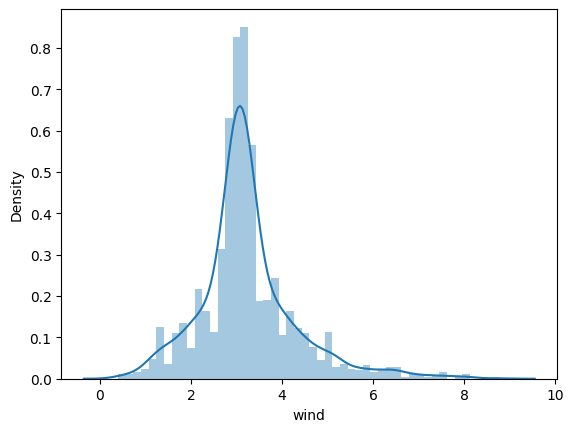

In [ ]:
sns.distplot(df_imp['wind'])

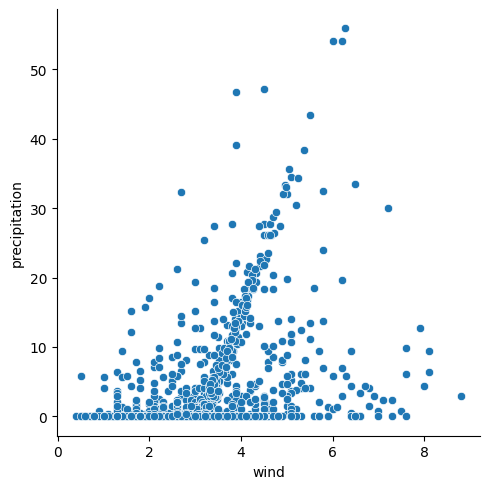

In [ ]:
sns.relplot(data=df_imp, x='wind', y='precipitation')

<Axes: xlabel='temp_max', ylabel='precipitation'>

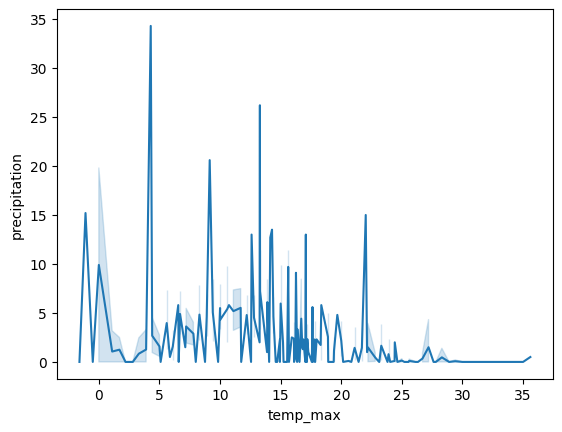

In [ ]:
sns.lineplot(data=df_imp, x='temp_max', y='precipitation')

<Axes: xlabel='temp_min', ylabel='precipitation'>

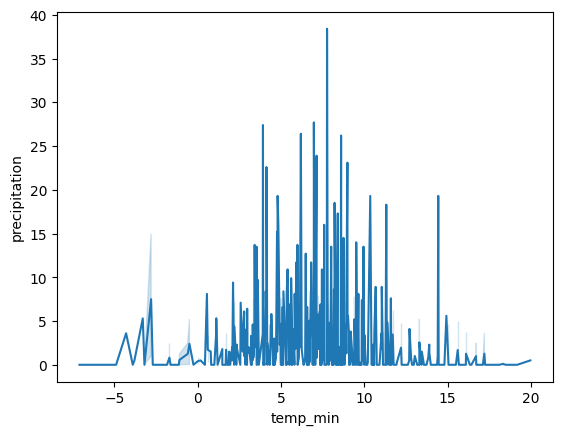

In [80]:
sns.lineplot(data=df_imp, x='temp_min', y='precipitation')